# Second task 
Data analysis 01 

In [1]:
# imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re

In [2]:
%pwd

'/home/adam/projects/github/engineer/notebooks'

In [3]:
%cd /home/adam/projects/github/engineer/data

/home/adam/projects/github/engineer/data


In [4]:
df = pd.read_excel('WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx')
df.head(20)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,United Nations,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Population Division,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Department of Economic and Social Affairs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,World Population Prospects 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,File POP/1-1: Total population (both sexes com...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,"Estimates, 1950 - 2020",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df = pd.read_excel('WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx',index_col=0, skiprows=16)
df.head(3)

,Variant,"Region, subregion, country or area *",geo,region,island,Notes,Country code,Type,Parent code,1950,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Index,,,,,,,,,,,,,,,,,,,,,
1,Estimates,WORLD,NaN,NaN,NaN,NaN,900,World,0,2.53643e+06,...,7.04119e+06,7.12583e+06,7.21058e+06,7.29529e+06,7.3798e+06,7.46402e+06,7.54786e+06,7.63109e+06,7.71347e+06,7.7948e+06
2,Estimates,UN development groups,NaN,NaN,NaN,a,1803,Label/Separator,900,...,...,...,...,...,...,...,...,...,...,...,...
3,Estimates,More developed regions,NaN,NaN,NaN,b,901,Development Group,1803,814819,...,1.23956e+06,1.24411e+06,1.24845e+06,1.25262e+06,1.25662e+06,1.26048e+06,1.26415e+06,1.26756e+06,1.27063e+06,1.2733e+06


In [6]:
# create list with column names
list_names = [str(x) for x in range(1950,2020)]
# print(list_names)

In [7]:
# remove columns
df = df.drop(columns=list_names)
df.head(3)
df.columns = ['Variant', 'Country','geo','region','island', 'Notes','Ccode', 'Type', 'Pcode', 'c2020']
df.head(1)

,Variant,Country,geo,region,island,Notes,Ccode,Type,Pcode,c2020
Index,,,,,,,,,,
1,Estimates,WORLD,NaN,NaN,NaN,NaN,900,World,0,7.7948e+06


In [8]:
for col in df.columns[:-1]:
    print(f'{col}:\n',pd.unique(df[f'{col}']),'\n')

Variant:
 ['Estimates'] 

Country:
 ['WORLD' 'UN development groups' 'More developed regions'
 'Less developed regions' 'Least developed countries'
 'Less developed regions, excluding least developed countries'
 'Less developed regions, excluding China'
 'Land-locked Developing Countries (LLDC)'
 'Small Island Developing States (SIDS)' 'World Bank income groups'
 'High-income countries' 'Middle-income countries'
 'Upper-middle-income countries' 'Lower-middle-income countries'
 'Low-income countries' 'No income group available' 'Geographic regions'
 'Africa' 'Asia' 'Europe' 'Latin America and the Caribbean'
 'Northern America' 'Oceania' 'Sustainable Development Goal (SDG) regions'
 'SUB-SAHARAN AFRICA' 'Eastern Africa' 'Burundi' 'Comoros' 'Djibouti'
 'Eritrea' 'Ethiopia' 'Kenya' 'Madagascar' 'Malawi' 'Mauritius' 'Mayotte'
 'Mozambique' 'Réunion' 'Rwanda' 'Seychelles' 'Somalia' 'South Sudan'
 'Uganda' 'United Republic of Tanzania' 'Zambia' 'Zimbabwe'
 'Middle Africa' 'Angola' 'Cameroon' 

In [9]:
delCol = ['Variant', 'Notes', 'Ccode','Pcode']
delRow = ['World','Label/Separator','Development Group','Special other','Income Group',\
      'Region','SDG region','Subregion','SDG subregion']

In [10]:
# drop columns in 'delCol' list
df = df.drop(columns=delCol)
for val in delRow:
    df = df[df.Type != val]
    


# remove 'Type' column
df = df.drop(columns='Type')
df.shape

(235, 5)

In [11]:
df.sort_values('c2020', ascending=False).head(10)

,Country,geo,region,island,c2020
Index,,,,,
128,China,asia,east,no,1.43932e+06
120,India,asia,south,no,1.38e+06
289,United States of America,america,north,no,331003
139,Indonesia,asia,south-east,no,273524
124,Pakistan,asia,south,no,220892
190,Brazil,america,south,no,212559
76,Nigeria,africa,west,no,206140
118,Bangladesh,asia,south,no,164689
240,Russian Federation,europe,east,no,145934


In [12]:
# get information about 'df'
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 27 to 289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  235 non-null    object
 1   geo      235 non-null    object
 2   region   235 non-null    object
 3   island   235 non-null    object
 4   c2020    235 non-null    object
dtypes: object(5)
memory usage: 11.0+ KB


In [13]:
df.loc[:,'c2020'] = df.c2020.convert_dtypes()*1000
df.loc[:,'c2020'] = df.c2020.astype('int')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 235 entries, 27 to 289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Country  235 non-null    object
 1   geo      235 non-null    object
 2   region   235 non-null    object
 3   island   235 non-null    object
 4   c2020    235 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 11.0+ KB


,Country,geo,region,island,c2020
Index,,,,,
27,Burundi,africa,east,no,11890781
28,Comoros,africa,east,no,869595
29,Djibouti,africa,east,no,988002
30,Eritrea,africa,east,no,3546427
31,Ethiopia,africa,east,no,114963583


In [14]:
df.sort_values('c2020',ascending=False).head(10).style.format({'c2020':"{:_}"})

,Country,geo,region,island,c2020
Index,,,,,
128,China,asia,east,no,1_439_323_774
120,India,asia,south,no,1_380_004_385
289,United States of America,america,north,no,331_002_647
139,Indonesia,asia,south-east,no,273_523_621
124,Pakistan,asia,south,no,220_892_331
190,Brazil,america,south,no,212_559_409
76,Nigeria,africa,west,no,206_139_587
118,Bangladesh,asia,south,no,164_689_383
240,Russian Federation,europe,east,no,145_934_460


In [15]:
# Country names validation

# In order to be able to compare the names of countries in differentxh tables, they must be unified. Scope:

#     deleting white characters from the beginning and end
#     replace different white characters between words with one single space
#     each word in the name begins with a capital letter


for i,country in enumerate(df.Country):
    contry = country.strip()
    contry = re.sub(r'\s+',' ',country)
    country = country.title()
    df.iloc[i,0] = country

df.sort_values('c2020',ascending=False).head(10).style.format({'c2020':"{:>_}"})



,Country,geo,region,island,c2020
Index,,,,,
128,China,asia,east,no,1_439_323_774
120,India,asia,south,no,1_380_004_385
289,United States Of America,america,north,no,331_002_647
139,Indonesia,asia,south-east,no,273_523_621
124,Pakistan,asia,south,no,220_892_331
190,Brazil,america,south,no,212_559_409
76,Nigeria,africa,west,no,206_139_587
118,Bangladesh,asia,south,no,164_689_383
240,Russian Federation,europe,east,no,145_934_460


In [16]:
# save data
name = 'countryPopulation.csv'
df.to_csv(name,sep=';',index=False)
%ls

countryPopulation.csv  WHO-COVID-19-global-data.csv
tmp.py                 WPP2019_POP_F01_1_TOTAL_POPULATION_BOTH_SEXES.xlsx


# Covid data

In [17]:
# # get fresh data
# import urllib.request
# import csv
# import urllib2
# url = 'https://covid19.who.int/table/WHO-COVID-19-global-data.csv'
# response = urllib2.urlopen(url)
# cr = csv.reader(response)
# %ls -l

In [18]:
cov = pd.read_csv('WHO-COVID-19-global-data.csv',encoding='utf-8')
cov.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [19]:
# column names
print(cov.columns.to_list())
cov.columns = cov.columns.str.strip()
print(cov.columns.to_list())

['Date_reported', ' Country_code', ' Country', ' WHO_region', ' New_cases', ' Cumulative_cases', ' New_deaths', ' Cumulative_deaths']
['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']


In [20]:
# drop columns
cov = cov.drop(columns=['Country_code','WHO_region'])
# short names
cov.columns = ['Date', 'Country', 'Ncases','CumCases', 'Ndeaths','Cumdeaths']
cov.head()

,Date,Country,Ncases,CumCases,Ndeaths,Cumdeaths
0,2020-01-03,Afghanistan,0,0,0,0
1,2020-01-04,Afghanistan,0,0,0,0
2,2020-01-05,Afghanistan,0,0,0,0
3,2020-01-06,Afghanistan,0,0,0,0
4,2020-01-07,Afghanistan,0,0,0,0


In [21]:
s1 = set(df.Country)
s2 = set(cov.Country)
s1.difference(s2)

{'Antigua And Barbuda',
 'Bolivia (Plurinational State Of)',
 'Bonaire, Sint Eustatius And Saba',
 'Bosnia And Herzegovina',
 'Channel Islands',
 'China, Hong Kong Sar',
 'China, Macao Sar',
 'China, Taiwan Province Of China',
 "Côte D'Ivoire",
 "Dem. People'S Republic Of Korea",
 'Democratic Republic Of The Congo',
 'Iran (Islamic Republic Of)',
 'Isle Of Man',
 "Lao People'S Democratic Republic",
 'Micronesia (Fed. States Of)',
 'Northern Mariana Islands',
 'Republic Of Korea',
 'Republic Of Moldova',
 'Saint Kitts And Nevis',
 'Saint Martin (French Part)',
 'Saint Pierre And Miquelon',
 'Saint Vincent And The Grenadines',
 'Sao Tome And Principe',
 'Sint Maarten (Dutch Part)',
 'State Of Palestine',
 'Trinidad And Tobago',
 'Turks And Caicos Islands',
 'United Kingdom',
 'United Republic Of Tanzania',
 'United States Of America',
 'Venezuela (Bolivarian Republic Of)',
 'Wallis And Futuna Islands',
 'Western Sahara'}

In [22]:
s2.difference(s1)

{'Antigua and Barbuda',
 'Bolivia (Plurinational State of)',
 'Bonaire, Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Côte d’Ivoire',
 "Democratic People's Republic of Korea",
 'Democratic Republic of the Congo',
 'Guernsey',
 'Iran (Islamic Republic of)',
 'Isle of Man',
 'Jersey',
 'Kosovo[1]',
 "Lao People's Democratic Republic",
 'Micronesia (Federated States of)',
 'Northern Mariana Islands (Commonwealth of the)',
 'Other',
 'Pitcairn Islands',
 'Republic of Korea',
 'Republic of Moldova',
 'Saint Kitts and Nevis',
 'Saint Martin',
 'Saint Pierre and Miquelon',
 'Saint Vincent and the Grenadines',
 'Sao Tome and Principe',
 'Sint Maarten',
 'The United Kingdom',
 'Trinidad and Tobago',
 'Turks and Caicos Islands',
 'United Republic of Tanzania',
 'United States of America',
 'Venezuela (Bolivarian Republic of)',
 'Wallis and Futuna',
 'occupied Palestinian territory, including east Jerusalem'}

In [23]:
pop = df
dif = s1.symmetric_difference(s2)
print(dif)

{'Isle Of Man', 'Kosovo[1]', 'Saint Kitts and Nevis', 'United States Of America', 'Democratic Republic Of The Congo', 'Bolivia (Plurinational State of)', 'Iran (Islamic Republic Of)', 'Venezuela (Bolivarian Republic Of)', 'Other', 'Sint Maarten', 'Saint Martin', 'United States of America', 'Republic Of Moldova', 'Saint Pierre and Miquelon', 'Saint Kitts And Nevis', 'Saint Martin (French Part)', "Lao People's Democratic Republic", 'State Of Palestine', 'Jersey', 'China, Taiwan Province Of China', 'Antigua and Barbuda', 'Republic of Korea', 'Saint Vincent and the Grenadines', 'occupied Palestinian territory, including east Jerusalem', 'Sint Maarten (Dutch Part)', 'Trinidad And Tobago', "Lao People'S Democratic Republic", 'Republic Of Korea', 'China, Hong Kong Sar', 'Channel Islands', 'Turks and Caicos Islands', 'Sao Tome And Principe', 'Turks And Caicos Islands', 'Republic of Moldova', 'Bonaire, Sint Eustatius and Saba', 'Côte d’Ivoire', 'Bolivia (Plurinational State Of)', "Côte D'Ivoire

In [24]:
data = cov.merge(pop,on='Country')
data.head()

,Date,Country,Ncases,CumCases,Ndeaths,Cumdeaths,geo,region,island,c2020
0,2020-01-03,Afghanistan,0,0,0,0,asia,south,no,38928341
1,2020-01-04,Afghanistan,0,0,0,0,asia,south,no,38928341
2,2020-01-05,Afghanistan,0,0,0,0,asia,south,no,38928341
3,2020-01-06,Afghanistan,0,0,0,0,asia,south,no,38928341
4,2020-01-07,Afghanistan,0,0,0,0,asia,south,no,38928341


In [25]:
from datetime import datetime, timedelta

# datetime.today().strftime('%Y-%m-%d')

yesterday_hour = datetime.now() - timedelta(1)

print(type(yesterday_hour))                                                                                                                                                                                    
print(yesterday_hour)

yesterday = datetime.strftime(yesterday_hour, '%Y-%m-%d')
print(yesterday)
print(type(yesterday)) 

<class 'datetime.datetime'>
2020-11-04 17:11:11.019483
2020-11-04
<class 'str'>


In [26]:
idx = cov.Date == yesterday
idx[idx==True]
tmp = cov.loc[idx]
tmp.head()

,Date,Country,Ncases,CumCases,Ndeaths,Cumdeaths
306,2020-11-04,Afghanistan,95,41728,3,1544
614,2020-11-04,Albania,381,21904,5,532
921,2020-11-04,Algeria,0,57942,0,1964
1228,2020-11-04,American Samoa,0,0,0,0
1536,2020-11-04,Andorra,22,4910,0,75


In [27]:
data = tmp.merge(pop,on="Country")
print(data.shape)
data.head()


(202, 10)


,Date,Country,Ncases,CumCases,Ndeaths,Cumdeaths,geo,region,island,c2020
0,2020-11-04,Afghanistan,95,41728,3,1544,asia,south,no,38928341
1,2020-11-04,Albania,381,21904,5,532,europe,south,no,2877800
2,2020-11-04,Algeria,0,57942,0,1964,africa,north,no,43851043
3,2020-11-04,American Samoa,0,0,0,0,oceania,polynesia,yes,55197
4,2020-11-04,Andorra,22,4910,0,75,europe,south,no,77265


In [28]:
set(data.Country)

{'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Botswana',
 'Brazil',
 'British Virgin Islands',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Falkland Islands (Malvinas)',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Guiana',
 'French Polynesia',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Gh

In [29]:
# analysis


In [30]:
data.Cumdeaths.describe()

count       202.000000
mean       4373.613861
std       16708.834774
min           0.000000
25%          25.250000
50%         152.500000
75%        1379.750000
max      160253.000000
Name: Cumdeaths, dtype: float64

(array([172.,  11.,   4.,   4.,   1.,   0.,   0.,   3.,   1.,   3.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([     0.   ,   4006.325,   8012.65 ,  12018.975,  16025.3  ,
         20031.625,  24037.95 ,  28044.275,  32050.6  ,  36056.925,
         40063.25 ,  44069.575,  48075.9  ,  52082.225,  56088.55 ,
         60094.875,  64101.2  ,  68107.525,  72113.85 ,  76120.175,
         80126.5  ,  84132.825,  88139.15 ,  92145.475,  96151.8  ,
        100158.125, 104164.45 , 108170.775, 112177.1  , 116183.425,
        120189.75 , 124196.075, 128202.4  , 132208.725, 136215.05 ,
        140221.375, 144227.7  , 148234.025, 152240.35 , 156246.675,
        160253.   ]),
 <BarContainer object of 40 artists>)

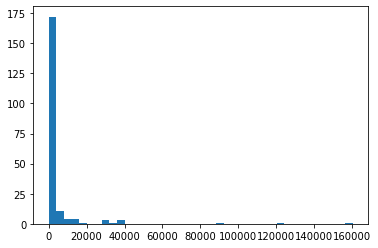

In [31]:
plt.hist(data.Cumdeaths,bins=40)
# plt.plot(x,y,'--r')

In [32]:
def myPdf(data,n=100):
    data = data.copy()
    mu = data.std()
    s = data.std()
    rng = (data.min(),data.max())
    x = np.random.uniform(*rng,n)
    x.sort()
    y = (1/(s*(2*np.pi)**0.5))*np.exp(-0.5*((x-mu)/s)**2)
    return x,y

In [33]:
x,y = myPdf(data.Cumdeaths)

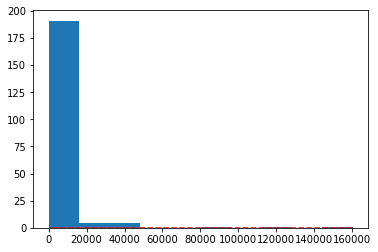

In [34]:
# print(x,y)
plt.hist(data.Cumdeaths,bins=10)
plt.plot(x,y,'--r')

In [35]:
from scipy.stats import shapiro

In [36]:
# shapiro?

In [37]:
print('stats: {}\tp-val{}'.format(*shapiro(data.Cumdeaths)))

stats: 0.2680644989013672	p-val1.3309784067219363e-27


<BarContainer object of 202 artists>

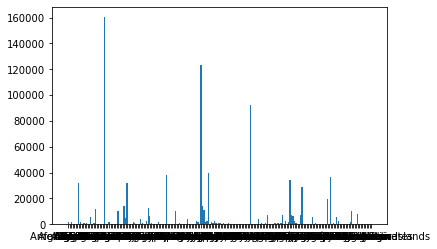

In [38]:
plt.bar(data.Country,data.Cumdeaths)

<BarContainer object of 160 artists>

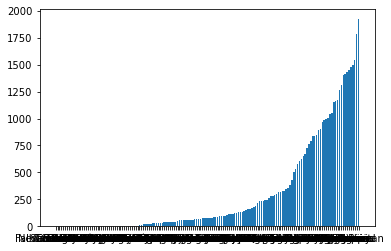

In [39]:
data.sort_values('Cumdeaths',inplace=True)
# d1 = data[data.Cumdeaths < 126]
d1 = data[:160]
plt.bar(d1.Country,d1.Cumdeaths)

<BarContainer object of 42 artists>

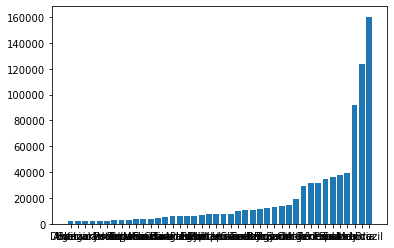

In [40]:
d2 = data.iloc[160:,:]
plt.bar(d2.Country,d2.Cumdeaths)

In [41]:
rr = np.round(np.linspace(0,data.shape[0],4),0).astype(int).tolist()

<BarContainer object of 42 artists>

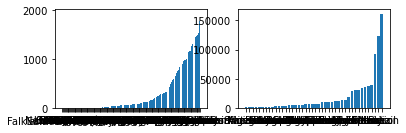

In [42]:
for i,v in enumerate(rr[:-1]):
    tmp = data.iloc[rr[i]:rr[i+1]]
d1 = data[:160]
d2 = data.iloc[160:,:]

plt.subplot(2,2,1)

plt.bar(d1.Country,d1.Cumdeaths)

plt.subplot(2,2,2)
plt.bar(d2.Country,d2.Cumdeaths)

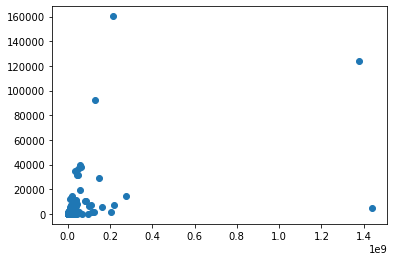

In [43]:
plt.scatter(data.c2020,data.Cumdeaths)

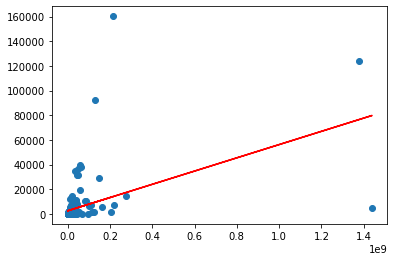

In [44]:
cof = np.polyfit(data.c2020,data.Cumdeaths,1)
rr = np.poly1d(cof)
yy = rr(data.c2020)
plt.scatter(data.c2020,data.Cumdeaths)
plt.plot(data.c2020,yy,'r')

<class 'pandas.core.series.Series'>


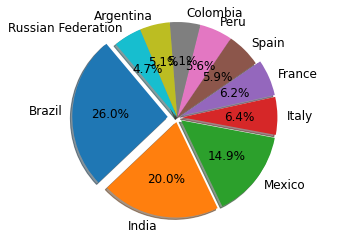

In [92]:
# pie plot
print(type(data.Cumdeaths))
sorted_cum_deaths = data.Cumdeaths.sort_values()
# print(sorted_cum_deaths)

# print(data.Country)


labels = data.Country.reindex(index=data.Country.index[::-1]).head(10)
sizes = data.Cumdeaths.reindex(index=data.Cumdeaths.index[::-1]).head(10)

p = plt.pie(sizes, labels=labels,explode=(0.1, 0.05, 0.05, 0.05, 0.05, 0, 0,0,0,0), autopct='%1.1f%%', startangle=130, shadow=True)
plt.axis('equal')

for i, (labels) in enumerate(p):
    if i > 0:
        for l in labels:
            l.set_fontsize(12)
        
plt.show()

In [69]:
data
# data["geo"]

,Date,Country,Ncases,CumCases,Ndeaths,Cumdeaths,geo,region,island,c2020
133,2020-11-04,New Caledonia,0,28,0,0,oceania,melanesia,yes,285491
31,2020-11-04,Cambodia,0,292,0,0,asia,south-east,no,16718971
186,2020-11-04,Tonga,0,0,0,0,oceania,polynesia,yes,105697
76,2020-11-04,Grenada,1,29,0,0,america,latin,yes,112519
183,2020-11-04,Timor-Leste,0,30,0,0,asia,south-east,no,1318442
...,...,...,...,...,...,...,...,...,...,...
65,2020-11-04,France,36254,1469508,854,37969,europe,west,no,65273512
93,2020-11-04,Italy,28241,759829,353,39412,europe,south,no,60461828
121,2020-11-04,Mexico,3763,933155,205,92100,america,central,no,128932753
88,2020-11-04,India,46253,8313876,514,123611,asia,south,no,1380004385


In [84]:
death_geo = data[["Cumdeaths","geo"]]
print(death_geo.head(10))

# get values only where are deaths
death_geo = death_geo[death_geo["Cumdeaths"] != 0]
print(death_geo.head(10))

deaths_geo = death_geo.groupby("geo")
deaths_africa = deaths_geo.apply(lambda x: x[x["geo"] == "africa"]["Cumdeaths"].sum())
deaths_america = deaths_geo.apply(lambda x: x[x["geo"] == "america"]["Cumdeaths"].sum())
deaths_asia = deaths_geo.apply(lambda x: x[x["geo"] == "asia"]["Cumdeaths"].sum())
deaths_australlia = deaths_geo.apply(lambda x: x[x["geo"] == "australlia"]["Cumdeaths"].sum())
deaths_europe = deaths_geo.apply(lambda x: x[x["geo"] == "europe"]["Cumdeaths"].sum())
deaths_oceania = deaths_geo.apply(lambda x: x[x["geo"] == "oceania"]["Cumdeaths"].sum())


     Cumdeaths      geo
133          0  oceania
31           0     asia
186          0  oceania
76           0  america
183          0     asia
143          0  oceania
42           0  oceania
99           0  oceania
51           0  america
157          0  america
     Cumdeaths      geo
125          1  america
34           1  america
25           1  america
29           1   africa
46           1  america
63           2  oceania
122          2   europe
107          3   europe
26           3     asia
145          7  oceania


In [88]:
print(deaths_africa["africa"])
print(deaths_america["america"])
print(deaths_asia["asia"])
print(deaths_australlia["australlia"])
print(deaths_europe["europe"])
print(deaths_oceania["oceania"])

43282
405084
210607
932
223438
127


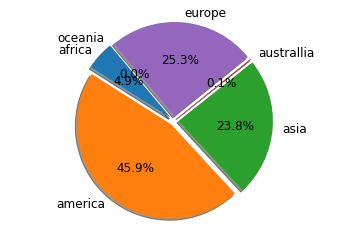

In [89]:
labels = "africa","america","asia","australlia","europe","oceania"
sizes = [deaths_africa["africa"],deaths_america["america"],deaths_asia["asia"],deaths_australlia["australlia"],deaths_europe["europe"],deaths_oceania["oceania"]]

p = plt.pie(sizes, labels=labels,explode=(0.05, 0.05, 0.05, 0.05, 0.05, 0.05), autopct='%1.1f%%', startangle=130, shadow=True)
plt.axis('equal')

for i, (labels) in enumerate(p):
    if i > 0:
        for l in labels:
            l.set_fontsize(12)
        
plt.show()

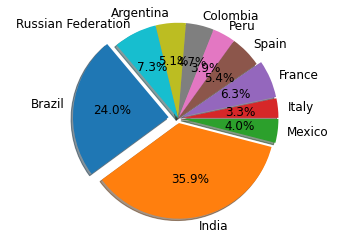

In [96]:
sorted_cumcases = data.CumCases.sort_values()
# print(sorted_cumcases)

# print(data.Country)


labels = data.Country.reindex(index=data.Country.index[::-1]).head(10)
sizes = data.CumCases.reindex(index=data.CumCases.index[::-1]).head(10)

p = plt.pie(sizes, labels=labels,explode=(0.1, 0.05, 0.05, 0.05, 0.05, 0, 0,0,0,0), autopct='%1.1f%%', startangle=130, shadow=True)
plt.axis('equal')

for i, (labels) in enumerate(p):
    if i > 0:
        for l in labels:
            l.set_fontsize(12)
        
plt.show()

# LAB 3

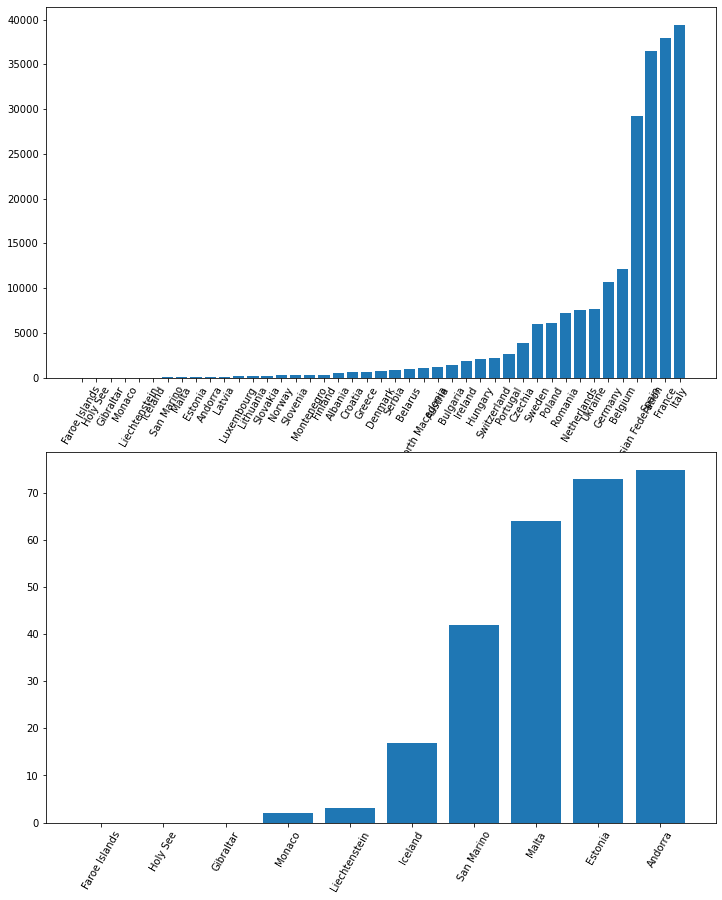

In [117]:
# deaths and infected at every continent
# deaths by europe country

# 1. visualize cumdeaths and Countries for europe
# 2. correlation between cumdeaths and cumcases

europe_cases = data[["Cumdeaths","geo", "CumCases", "Country","island"]]

#filter only europe
is_europe =  (europe_cases["geo"]=="europe" )

europe_cases = europe_cases[is_europe]
is_not_island = europe_cases["island"]!="yes"
europe_cases = europe_cases[is_not_island]
# print(europe_cases)

plt.figure(figsize=(12,15))

plt.subplot(211)
plt.xticks(rotation=60)
plt.yscale="log"

plt.bar(europe_cases.Country,europe_cases.Cumdeaths)

plt.subplot(212)
plt.xticks(rotation=60)
plt.bar(europe_cases.Country.head(10),europe_cases.Cumdeaths.head(10))

plt.show()


<BarContainer object of 202 artists>

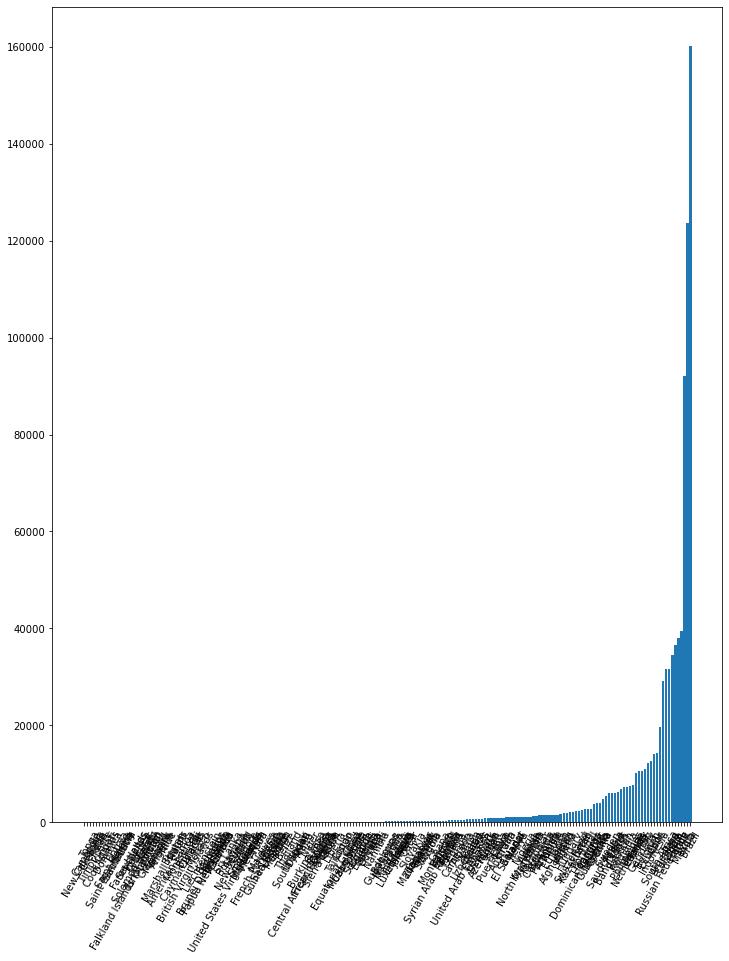

In [119]:
# cumdeaths and cumcases
fig = plt.figure(figsize=(12,15))
cum_death_cum_cases= data[["Cumdeaths", "CumCases", "Country"]]

y1 = cum_death_cum_cases.Cumdeaths
y2 = cum_death_cum_cases.CumCases

x1 = cum_death_cum_cases.Country
ax1 = fig.add_subplot(111)
plt.xticks(rotation=60)
plt.yscale="log"

plt.bar(x1,y1)

In [133]:
# print by countries

death_geo = data[["Cumdeaths","geo","CumCases"]]

# get values only where are deaths
death_geo = death_geo[death_geo["Cumdeaths"] != 0]

deaths_geo = death_geo.groupby("geo")
# ss = death_geo.sum().sort()# values('Cumdeaths')

gr = deaths_geo
ss = gr.sum().sort_values('Cumdeaths')
ss.index

Index(['oceania', 'australlia', 'africa', 'asia', 'europe', 'america'], dtype='object', name='geo')

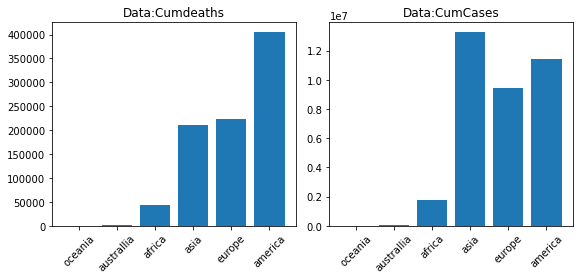

In [134]:
f = plt.figure(figsize=(12,4))
for i,c in enumerate(ss.columns,1):
    plt.subplot(1,3,i)
    plt.bar(ss.index,ss[c],log=False)
    plt.title(f"Data:{c}")
    plt.xticks(rotation=45)
    
plt.tight_layout()

In [135]:
gr.aggregate('sum').sort_values('Cumdeaths')

,Cumdeaths,CumCases
geo,,
oceania,127,14328
australlia,932,29225
africa,43282,1789438
asia,210607,13262102
europe,223438,9408136
america,405084,11425540


In [136]:
# Aniva

from scipy.stats import f_oneway

data.columns

Index(['Date', 'Country', 'Ncases', 'CumCases', 'Ndeaths', 'Cumdeaths', 'geo',
       'region', 'island', 'c2020'],
      dtype='object')

In [137]:
grGeo = data.groupby('geo')["Cumdeaths"]
grGeo.describe()

,count,mean,std,min,25%,50%,75%,max
geo,,,,,,,,
africa,53.0,816.641509,2823.480661,0.0,55.0,95.0,320.0,19539.0
america,43.0,9420.558140,28475.797195,0.0,4.0,129.0,2470.0,160253.0
asia,43.0,4897.837209,18833.814023,0.0,48.5,667.0,2018.5,123611.0
australlia,2.0,466.000000,623.668181,25.0,245.5,466.0,686.5,907.0
europe,43.0,5196.232558,10426.920528,0.0,123.0,728.0,4941.0,39412.0
oceania,18.0,7.055556,20.293355,0.0,0.0,0.0,0.0,80.0


In [138]:
dd = grGeo.groups
dd

{'africa': [158, 57, 165, 29, 40, 119, 23, 153, 156, 81, 20, 104, 120, 68, 184, 173, 50, 35, 28, 136, 80, 166, 105, 56, 41, 127, 30, 36, 171, 191, 59, 69, 129, 114, 118, 111, 110, 201, 5, 72, 163, 200, 32, 176, 106, 98, 137, 187, 60, 2, 126, 54, 172], 'america': [76, 51, 157, 159, 61, 75, 6, 125, 34, 25, 46, 16, 21, 194, 117, 9, 19, 195, 66, 177, 82, 45, 77, 13, 135, 94, 83, 151, 55, 43, 146, 52, 85, 144, 79, 33, 53, 37, 7, 39, 147, 121, 24], 'asia': [31, 183, 189, 123, 22, 26, 175, 47, 167, 198, 113, 182, 181, 152, 112, 180, 14, 70, 193, 196, 199, 103, 12, 100, 96, 131, 101, 141, 128, 8, 0, 95, 97, 92, 38, 162, 15, 142, 148, 188, 90, 89, 88], 'australlia': [134, 10], 'europe': [62, 84, 73, 122, 107, 87, 161, 115, 58, 4, 102, 109, 108, 168, 140, 169, 124, 64, 1, 44, 74, 49, 164, 17, 139, 11, 27, 91, 86, 179, 150, 48, 178, 149, 154, 132, 192, 71, 18, 155, 174, 65, 93], 'oceania': [133, 186, 143, 42, 99, 160, 170, 190, 185, 197, 116, 138, 3, 130, 63, 145, 67, 78]}

In [140]:
# f_oneway?

f ,pval = f_oneway(*dd.values())
print(f,pval)

2.352358402986345 0.042169383472196904


In [145]:
sl = {}
for gr in ['geo','region','island']:
    val = data.groupby(gr)['Cumdeaths'].groups.values()
    sl[gr]= f_oneway(*val)
    
pd.DataFrame(sl,index=['f stat', 'p val'])

,geo,region,island
f stat,2.352358,2.118506,0.210509
p val,0.042169,0.024820,0.646867


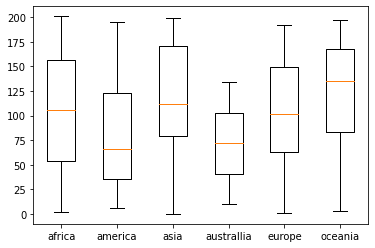

In [147]:
plt.boxplot(dd.values(),labels=dd.keys());